# Ejercicio Formativo 2 Capítulo 2

## Importando librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display #para mostrar más de un elemento por celda de Jupyter

## Misión 0: Aspectos Básicos

In [2]:
df = pd.read_csv("data_E2.csv")

In [3]:
display(df.head(10))

,Year,Month,Day,O3,PM2.5,Environmental_risk
0,2008,1,1,29.63,NaN,NaN
1,2008,1,2,21.46,NaN,NaN
2,2008,1,3,24.25,NaN,NaN
3,2008,1,4,29.04,NaN,NaN
4,2008,1,5,30.17,NaN,NaN
5,2008,1,6,29.50,NaN,NaN
6,2008,1,7,26.79,NaN,NaN
7,2008,1,8,25.29,NaN,NaN
8,2008,1,9,14.62,NaN,NaN
9,2008,1,10,18.17,NaN,NaN


Se obtiene sus métricas usando la función `describe()` de pandas.

In [4]:
df.describe()

,Year,Month,Day,O3,PM2.5
count,2984.000000,2984.000000,2984.000000,2878.000000,2725.000000
mean,2011.592493,6.419236,15.715818,16.313767,28.814594
std,2.357040,3.487660,8.804066,7.995680,17.479388
min,2008.000000,1.000000,1.000000,1.000000,5.000000
25%,2010.000000,3.000000,8.000000,9.392500,16.170000
50%,2012.000000,6.000000,16.000000,16.960000,23.210000
75%,2014.000000,9.000000,23.000000,22.357500,37.210000
max,2016.000000,12.000000,31.000000,56.300000,126.200000


Para los valores no númericos se ve la frecuencia de los valores usando la función `value_counts()` de pandas.

In [5]:
environmental_risk = df["Environmental_risk"]
display(environmental_risk)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
2979     Bajo
2980     Bajo
2981     Bajo
2982    medio
2983    medio
Name: Environmental_risk, Length: 2984, dtype: object

In [6]:
environmental_risk.value_counts()

Environmental_risk
medio      1605
Bajo        750
nulo        134
Alto        106
extremo      61
Name: count, dtype: int64

## Misión 1: Limpieza y depuración

### Valores extremos

#### Columna O3

En primer lugar se usara un gráfico de caja y bigote para identificar los valores extremos de la columna O3.

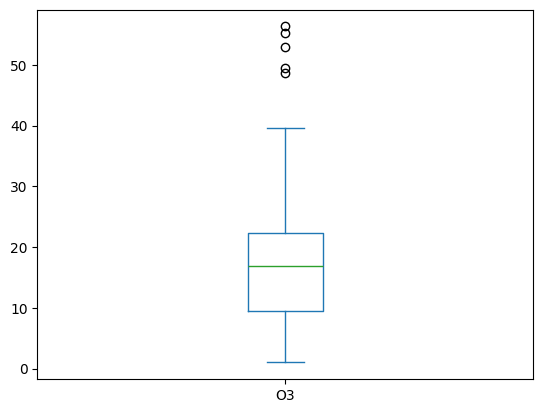

In [7]:
df['O3'].plot.box()
plt.show()

Se puede ver que los valores extremos son los que estan por sobre el bigote superior.

##### Corrigiendo valores extremos

In [8]:
df_log = df.copy()

Para corregir los valores extremos se mantendrán solo aquellos que esten por debajo del bigote superior de la caja, el cual es igual a 40. Para lograr esto se usa la función `loc` de pandas. La cual permite seleccionar solo aquellos valores que cumplan con la condición.

In [9]:
df = df.loc[df["O3"] <= 40]

Ahora se revisa nuevamente el diagrama de caja y bigote para verificar que los valores extremos han sido eliminados.

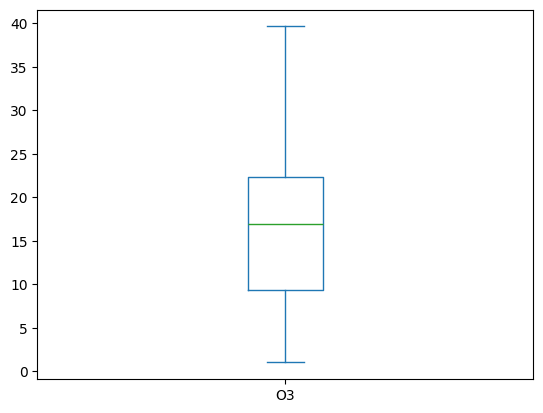

In [10]:
df['O3'].plot.box()
plt.show()

En clase también se vió que una manera de reducir el efecto de los valores extremos es aplicar una transformación logarítmica a los datos. Para esto se usa la función `np.log` de numpy.

In [11]:
df_log['O3'] = np.log(df_log['O3'])

<Axes: >

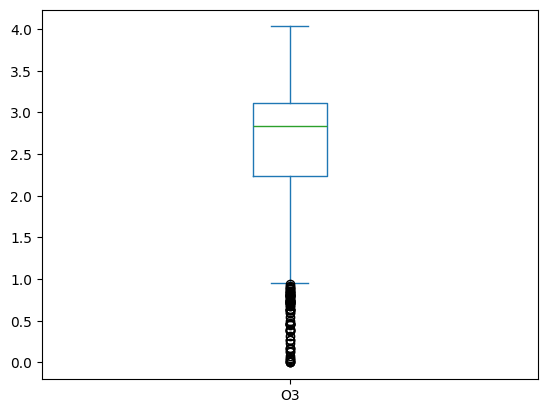

In [12]:
df_log['O3'].plot.box()

Como se puede ver en el gráfico de caja y bigote, usando este método los valores extremos pasaron de estar por sobre el bigote superior a estar por debajo del bigote inferior e incluso se puede ver que hay más valores extremos. Por lo tanto esta manera no es efectiva para corregir los valores extremos. Debido a esto se procederá a eliminar los valores extremos como se vio en el primer método.

#### Columna PM2.5

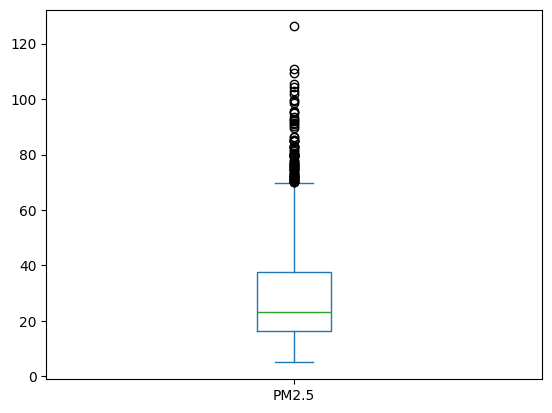

In [13]:
df['PM2.5'].plot.box()
plt.show()

Se puede ver que los valores extremos son los que estan por sobre el bigote superior al igual que en la columna O3. Sin embargo, a diferencia de la columna O3, en la columna PM2.5 se puede ver una gran presencia de valores extremos por ello si se decidiera eliminar los valores extremos se perdería una gran cantidad de datos, por ende en este caso se optará por tratar de reducir el efecto de los valores extremos aplicando una transformación logarítmica a los datos.

##### Corrigiendo valores extremos

In [14]:
df['PM2.5'] = np.log(df['PM2.5'])

Ahora se revisa nuevamente el diagrama de caja y bigote para ver el estado de los valores extremos.

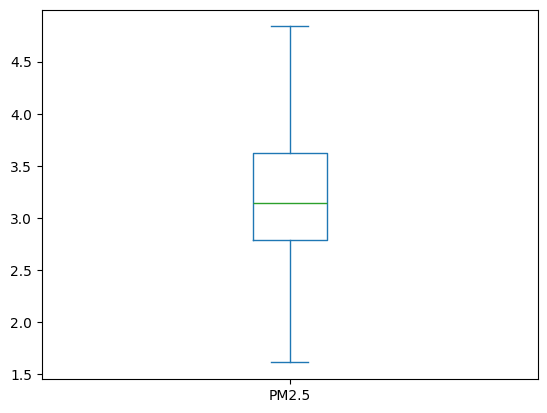

In [15]:
df['PM2.5'].plot.box()
plt.show()

### Valores Nulos

Se hace uso de la línea de código presentada en el material de clase para ver la cantidad de valores nulos.

In [16]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                 222
Environmental_risk    222
dtype: int64

Se crean copias de los dataframes para no modificar el original y ejecutar las correcciones en las copias. El dataframe `df_mean` tendrá el método en el cual los valores nulos se reemplazan por la media mientras que `df_delete` tendrá el método en el cual se eliminan los valores nulos.

In [17]:
df_mean = df.copy()
df_delete = df.copy()

Para el primer método que nos fue solicitado se hace uso de la función`fillna()` de pandas para rellenar los valores nulos con el promedio de la columna.

In [18]:
df_mean['O3'] = df_mean['O3'].fillna(df['O3'].mean())
df_mean['PM2.5'] = df_mean['PM2.5'].fillna(df['PM2.5'].mean())


Para el segundo método se hace uso de la función `dropna()` de pandas para eliminar las filas que contengan valores nulos, especificando las columnas que se revisarán usando el parámetro `subset`.

In [19]:
df_delete = df_delete.dropna(subset=['O3', 'PM2.5'])

## Misión 2

### Tabla para Dataframe que se reemplazo valores nulos por la media

In [20]:
mean_O3 = df_mean['O3'].mean()
std_O3 = df_mean['O3'].std()
max_O3 = df_mean['O3'].max()
min_O3 = df_mean['O3'].min()
kurtosis_O3 = df_mean['O3'].kurtosis()

mean_PM25 = df_mean['PM2.5'].mean()
std_PM25 = df_mean['PM2.5'].std()
max_PM25 = df_mean['PM2.5'].max()
min_PM25 = df_mean['PM2.5'].min()
kurtosis_PM25 = df_mean['PM2.5'].kurtosis()

corr_O3_PM25 = df_mean['O3'].corr(df_mean['PM2.5'])

tabla_ordenda = pd.DataFrame({
    'Estadístico': ['Media', 'Desviación estándar', 'Máximo', 'Mínimo', 'Curtosis', 'Correlación O3-PM2.5'],
    'O3': [mean_O3, std_O3, max_O3, min_O3, kurtosis_O3, corr_O3_PM25],
    'PM2.5': [mean_PM25, std_PM25, max_PM25, min_PM25, kurtosis_PM25, '']
})

display(tabla_ordenda)
     

,Estadístico,O3,PM2.5
0,Media,16.250821,3.201269
1,Desviación estándar,7.857782,0.548864
2,Máximo,39.650000,4.837868
3,Mínimo,1.000000,1.609438
4,Curtosis,-0.944356,-0.328626
5,Correlación O3-PM2.5,-0.432477,


### Tabla para Dataframe en la que se eliminaron las filas con valores nulos

In [21]:
mean_O3 = df_delete['O3'].mean()
std_O3 = df_delete['O3'].std()
max_O3 = df_delete['O3'].max()
min_O3 = df_delete['O3'].min()
kurtosis_O3 = df_delete['O3'].kurtosis()

mean_PM25 = df_delete['PM2.5'].mean()
std_PM25 = df_delete['PM2.5'].std()
max_PM25 = df_delete['PM2.5'].max()
min_PM25 = df_delete['PM2.5'].min()
kurtosis_PM25 = df_delete['PM2.5'].kurtosis()

corr_O3_PM25 = df_delete['O3'].corr(df_delete['PM2.5'])

tabla_ordenda = pd.DataFrame({
    'Estadístico': ['Media', 'Desviación estándar', 'Máximo', 'Mínimo', 'Curtosis', 'Correlación O3-PM2.5'],
    'O3': [mean_O3, std_O3, max_O3, min_O3, kurtosis_O3, corr_O3_PM25],
    'PM2.5': [mean_PM25, std_PM25, max_PM25, min_PM25, kurtosis_PM25, '']
})

display(tabla_ordenda)

,Estadístico,O3,PM2.5
0,Media,15.892422,3.201269
1,Desviación estándar,7.890672,0.571391
2,Máximo,39.650000,4.837868
3,Mínimo,1.000000,1.609438
4,Curtosis,-0.944448,-0.535191
5,Correlación O3-PM2.5,-0.448351,


## Misión 3: Visualización

### Dataframe que se reemplazo valores nulos por la media

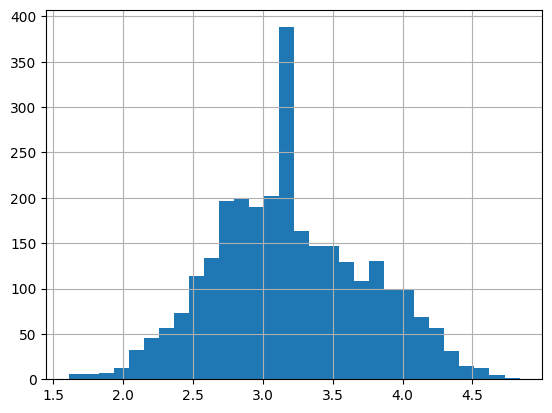

In [22]:
df_mean['PM2.5'].hist(bins=30)
plt.show()

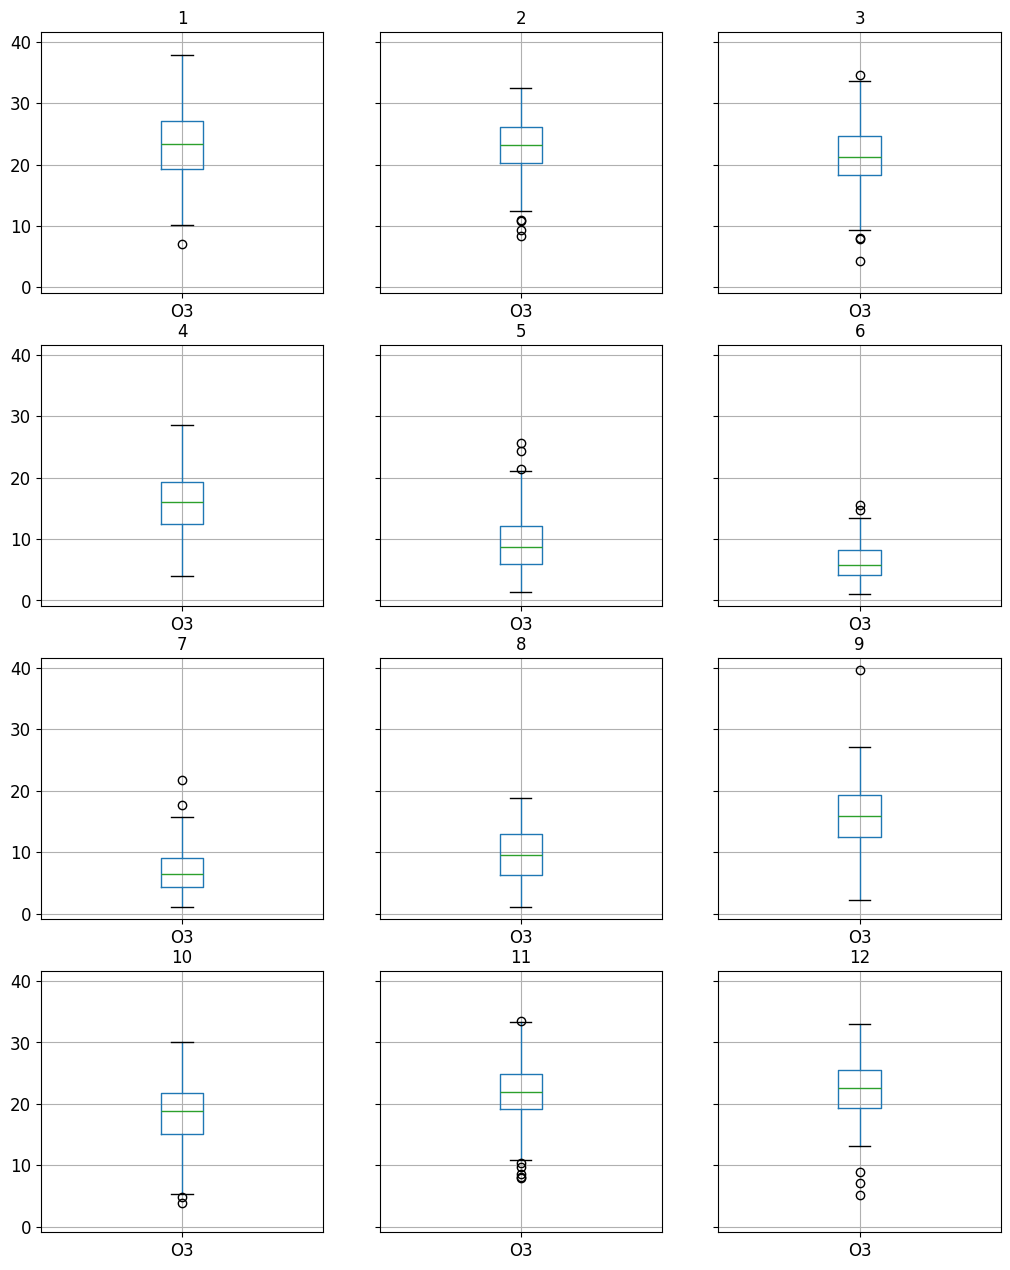

In [23]:
df_mean.groupby('Month').boxplot(column='O3', fontsize=12, figsize=(12, 16))
plt.show()

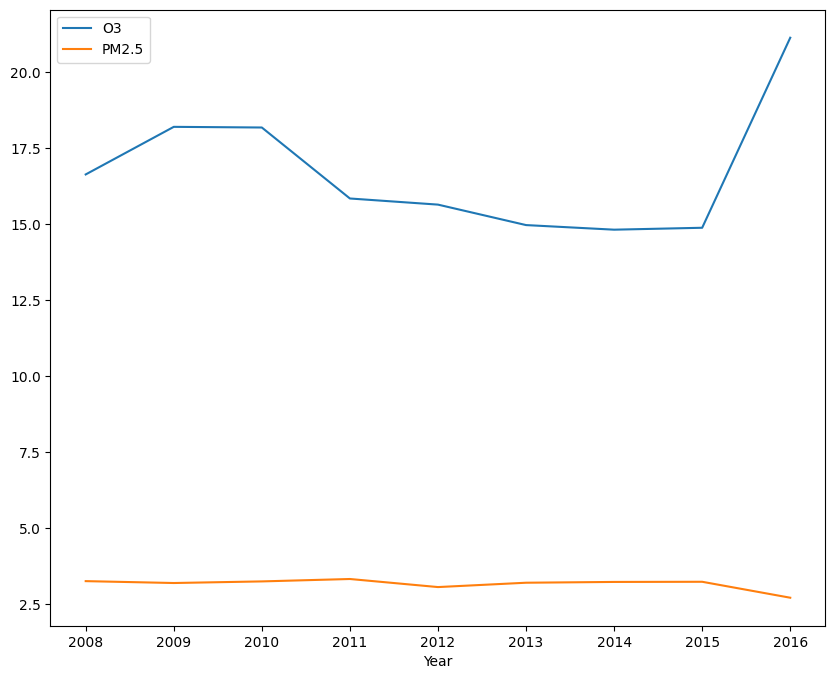

In [24]:
df_mean.groupby("Year")[["O3", "PM2.5"]].mean().plot.line(figsize=(10, 8))
plt.show()

### Dataframe que se corrigió eliminando filas con valores nulos

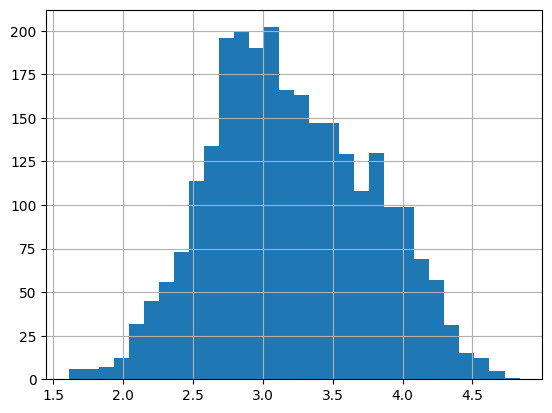

In [25]:
df_delete['PM2.5'].hist(bins=30)
plt.show()

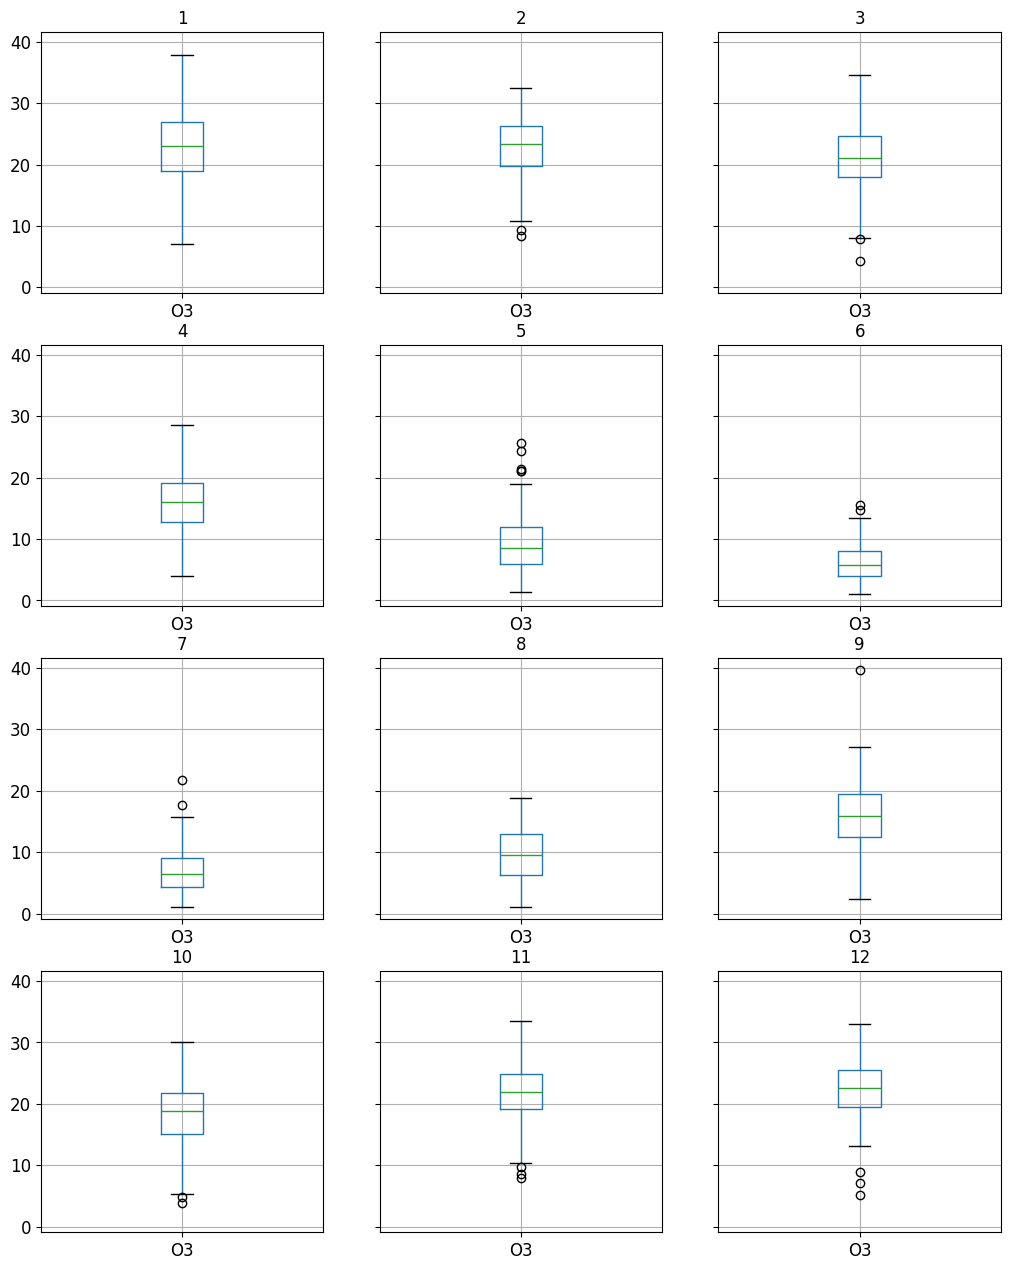

In [26]:
df_delete.groupby('Month').boxplot(column='O3', fontsize=12, figsize=(12, 16))
plt.show()

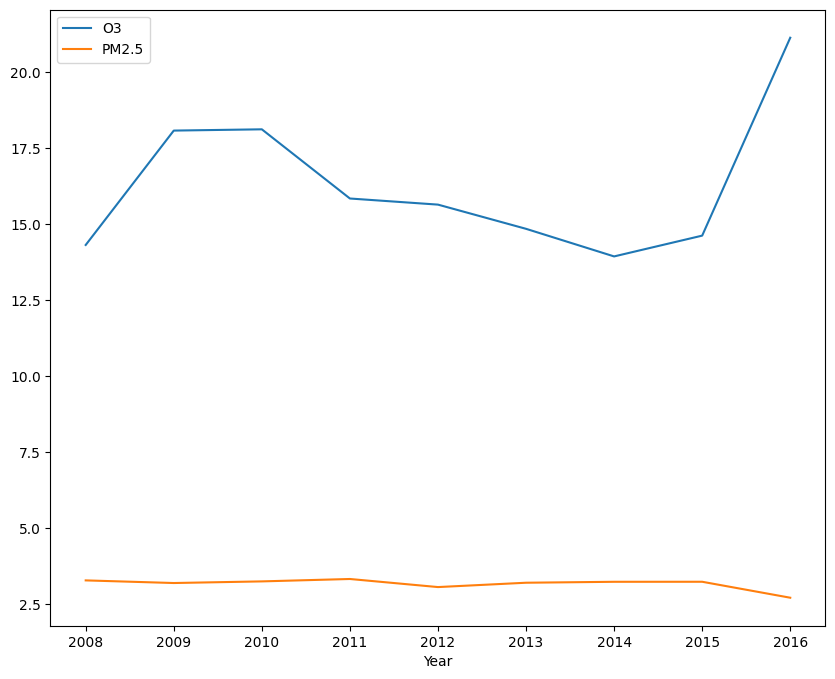

In [27]:
df_delete.groupby("Year")[["O3", "PM2.5"]].mean().plot.line(figsize=(10, 8))
plt.show()

# Misión 4: Categorización

Para esta misión se creo una función llamada `determinar_categoria`, la cual recibe como parámetros la fila que se estará revisando y métricas de la columna que se estará revisando. La función determina la categoría de la fila según las métricas de la columna. Se utilizarón las métricas de media y desviación estandard para determinar la categoría de la fila. Esto debido a que la primera indica el valor promedio de la columna y la segunda indica la dispersión de los datos. Por ende si se dispersaba mucho por sobre la media se consideraba una categoría alta, si se dispersaba mucho por debajo de la media se consideraba una categoría baja y si se dispersaba poco se consideraba una categoría media.

In [28]:
def determinar_categoria(fila, media_O3, std_O3, media_PM25, std_PM25):
    if pd.isnull(fila['Environmental_risk']):
        if fila['O3'] > media_O3:
            if fila['O3'] > media_O3 + 2 * std_O3:
                return 'extremo'
            else:
                if fila['PM2.5'] > media_PM25:
                    if fila['PM2.5'] > media_PM25 + 2 * std_PM25:
                        return 'extremo'
                    else:
                        return 'Alto'
                else:
                    return 'medio'
        else:
            return 'Bajo'
    else:
        return fila['Environmental_risk']

### Dataframe que se reemplazo valores nulos por la media

In [29]:
df_mean.apply(lambda x: sum(x.isnull()),axis=0) 

Year                    0
Month                   0
Day                     0
O3                      0
PM2.5                   0
Environmental_risk    222
dtype: int64

In [30]:
df_mean['Environmental_risk'].value_counts()

Environmental_risk
medio      1602
Bajo        750
nulo        134
Alto        105
extremo      60
Name: count, dtype: int64

Para aplicar esta función se hace uso de la función `apply` de pandas, la cual permite aplicar una función a cada fila de un dataframe, esto señalando que el parámetro `axis` es igual a 1.

In [31]:
media_O3 = df_mean['O3'].mean()
std_O3 = df_mean['O3'].std()
media_PM25 = df_mean['PM2.5'].mean()
std_PM25 = df_mean['PM2.5'].std()
df_mean['Environmental_risk'] = df_mean.apply(determinar_categoria, args=(media_O3, std_O3, media_PM25, std_PM25), axis=1)

In [32]:
df_mean.apply(lambda x: sum(x.isnull()),axis=0) 

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [33]:
df_mean['Environmental_risk'].value_counts()

Environmental_risk
medio      1602
Bajo        793
Alto        282
nulo        134
extremo      62
Name: count, dtype: int64

### Dataframe que se corrigió eliminando filas con valores nulos

In [34]:
df_delete.apply(lambda x: sum(x.isnull()),axis=0) 

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [35]:
df_delete['Environmental_risk'].value_counts()

Environmental_risk
medio      1602
Bajo        750
nulo        134
Alto        105
extremo      60
Name: count, dtype: int64

In [36]:
media_O3 = df_delete['O3'].mean()
std_O3 = df_delete['O3'].std()
media_PM25 = df_delete['PM2.5'].mean()
std_PM25 = df_delete['PM2.5'].std()
df_delete['Environmental_risk'] = df_delete.apply(determinar_categoria, args=(media_O3, std_O3, media_PM25, std_PM25), axis=1)

In [37]:
df_delete.apply(lambda x: sum(x.isnull()),axis=0) 

Year                  0
Month                 0
Day                   0
O3                    0
PM2.5                 0
Environmental_risk    0
dtype: int64

In [38]:
df_delete['Environmental_risk'].value_counts()

Environmental_risk
medio      1602
Bajo        750
nulo        134
Alto        105
extremo      60
Name: count, dtype: int64